In [12]:
import scanpy as sc
import pandas as pd
import anndata as ad

## subsetting SEAAD and ROSMAP based on hvg

In [2]:
import dask.distributed as dd
import scanpy as sc
import anndata as ad
import h5py
import pandas as pd

sc.logging.print_header()

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.4 anndata==0.11.3 umap==0.5.7 numpy==2.1.3 scipy==1.15.1 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 pynndescent==0.5.13


In [5]:
hvg = pd.read_csv('hvg.csv')

In [6]:
hvg_list = list(hvg['Unnamed: 0'])

In [4]:
seaad_mtg = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_MTG_RNAseq_final-nuclei.2024-02-13_count.h5ad')
seaad_mtg = seaad_mtg[:, seaad_mtg.var_names.isin(hvg_list)].copy()
seaad_mtg.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_MTG_RNAseq_final-nuclei.2024-02-13_count_hvg.h5ad')

In [3]:
seaad_dlpfc = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_DLPFC_RNAseq_final-nuclei.2024-02-13_count.h5ad')
seaad_dlpfc = seaad_dlpfc[:, seaad_dlpfc.var_names.isin(hvg_list)].copy()
seaad_dlpfc.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_DLPFC_RNAseq_final-nuclei.2024-02-13_count_hvg.h5ad')

In [10]:
rosmap = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all.h5ad')
rosmap = rosmap[:, rosmap.var_names.isin(hvg_list)].copy()
rosmap.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_seaad.h5ad')

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## aligning variables 

In [68]:
seaad_mtg = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_MTG_RNAseq_final-nuclei.2024-02-13_count_hvg.h5ad')
seaad_dlpfc = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_DLPFC_RNAseq_final-nuclei.2024-02-13_count_hvg.h5ad')
rosmap = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_seaad.h5ad')

### SEAAD

In [7]:
print(seaad_mtg.X.data)
print(seaad_dlpfc.X.data)
print(rosmap.X.data)

[1. 1. 1. ... 5. 2. 1.]
[ 1. 14.  1. ...  2.  2.  1.]
[1. 6. 1. ... 2. 2. 1.]


In [37]:
len(seaad_mtg.obs['Donor ID'].unique())

89

In [38]:
len(seaad_dlpfc.obs['Donor ID'].unique())

83

In [57]:
# remove neurotypical reference from the dataset
print(seaad_mtg.obs[seaad_mtg.obs['Neurotypical reference']=='True']['Donor ID'].unique())
seaad_mtg = seaad_mtg[seaad_mtg.obs['Neurotypical reference']=='False']

In [58]:
# remove neurotypical reference from the dataset
print(seaad_dlpfc.obs[seaad_dlpfc.obs['Neurotypical reference']=='True']['Donor ID'].unique())
seaad_dlpfc = seaad_dlpfc[seaad_dlpfc.obs['Neurotypical reference']=='False']

['H18.30.002', 'H19.30.001', 'H19.30.002']
Categories (83, object): ['H18.30.002', 'H19.30.001', 'H19.30.002', 'H19.33.004', ..., 'H21.33.044', 'H21.33.045', 'H21.33.046', 'H21.33.047']


In [62]:
print(len(set(seaad_mtg.obs['Donor ID'].unique()).intersection(seaad_dlpfc.obs['Donor ID'].unique())))
print(len(seaad_mtg.obs['Donor ID'].unique()))
print(len(seaad_dlpfc.obs['Donor ID'].unique())) # dlpfc is missing 4 donors for some reason

80
84
80


In [63]:
# number of cells per donor ranges from 1837 to 28939
seaad_mtg.obs.groupby('Donor ID').count().sort_values(by = 'sample_id')

/tmp/ipykernel_4182905/1857340421.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seaad_mtg.obs.groupby('Donor ID').count().sort_values(by = 'sample_id')


,sample_id,Neurotypical reference,Organism,Brain Region,Sex,Gender,Age at Death,Race (choice=White),Race (choice=Black/ African American),Race (choice=Asian),...,Used in analysis,Class confidence,Class,Subclass confidence,Subclass,Supertype confidence,Supertype (non-expanded),Supertype,Continuous Pseudo-progression Score,Severely Affected Donor
Donor ID,,,,,,,,,,,,,,,,,,,,,
H21.33.020,1837,1837,1837,1837,1837,1837,1837,1837,1837,1837,...,1837,1837,1837,1837,1837,1837,1837,1837,1837,1837
H20.33.038,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,...,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357
H21.33.034,3447,3447,3447,3447,3447,3447,3447,3447,3447,3447,...,3447,3447,3447,3447,3447,3447,3447,3447,3447,3447
H20.33.033,5227,5227,5227,5227,5227,5227,5227,5227,5227,5227,...,5227,5227,5227,5227,5227,5227,5227,5227,5227,5227
H21.33.046,5693,5693,5693,5693,5693,5693,5693,5693,5693,5693,...,5693,5693,5693,5693,5693,5693,5693,5693,5693,5693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H20.33.039,24964,24964,24964,24964,24964,24964,24964,24964,24964,24964,...,24964,24964,24964,24964,24964,24964,24964,24964,24964,24964
H20.33.043,25507,25507,25507,25507,25507,25507,25507,25507,25507,25507,...,25507,25507,25507,25507,25507,25507,25507,25507,25507,25507
H21.33.027,26857,26857,26857,26857,26857,26857,26857,26857,26857,26857,...,26857,26857,26857,26857,26857,26857,26857,26857,26857,26857


In [65]:
seaad_mtg.obs.rename(columns={'Donor ID': 'Donor_ID'}, inplace=True)
seaad_dlpfc.obs.rename(columns={'Donor ID': 'Donor_ID'}, inplace=True)

In [67]:
seaad_mtg.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_MTG_RNAseq_final-nuclei.2024-02-13_count_hvg_aligned.h5ad')
seaad_dlpfc.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_DLPFC_RNAseq_final-nuclei.2024-02-13_count_hvg.h5ad')


### ROSMAP

In [69]:
rosmap.obs.groupby('individualID').count().sort_values(by = 'nCount_RNA')

/tmp/ipykernel_4182905/3781496098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rosmap.obs.groupby('individualID').count().sort_values(by = 'nCount_RNA')


,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,batch,DoubletFinder.score,subset,class,state,projid,...,age_at_visit_max,age_first_ad_dx,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv
individualID,,,,,,,,,,,,,,,,,,,,,
R5026720,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
R5405023,707,707,707,707,707,707,707,707,707,707,...,707,707,707,707,707,707,707,707,707,707
R4022468,849,849,849,849,849,849,849,849,849,849,...,849,849,849,849,849,849,849,849,849,849
R1583702,869,869,869,869,869,869,869,869,869,869,...,869,869,869,869,869,869,869,869,869,869
R5138383,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083,...,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R5693901,9105,9105,9105,9105,9105,9105,9105,9105,9105,9105,...,9105,9105,9105,9105,9105,9105,9105,9105,9105,9105
R8724814,9869,9869,9869,9869,9869,9869,9869,9869,9869,9869,...,9869,0,9869,0,9869,9869,9869,9869,9869,9869
R4817881,10566,10566,10566,10566,10566,10566,10566,10566,10566,10566,...,10566,10566,10566,10566,10566,10566,10566,10566,10566,10566


In [70]:
rosmap = rosmap[~rosmap.obs.individualID.isin(['NA', 'R5026720'])]

In [71]:
rosmap

View of AnnData object with n_obs × n_vars = 1625707 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv'

In [72]:
rosmap.obs['Donor_ID'] = rosmap.obs['individualID']

/tmp/ipykernel_4182905/3700610765.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  rosmap.obs['Donor_ID'] = rosmap.obs['individualID']


In [74]:
rosmap.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_seaad_aligned.h5ad')

## plot umap

In [2]:
rna_mtg = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_MTG_RNAseq_final-nuclei.2024-02-13_count_hvg_aligned.h5ad')
rna_dlpfc = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_DLPFC_RNAseq_final-nuclei.2024-02-13_count_hvg_aligned.h5ad')
rna_sun = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_seaad_aligned.h5ad')

In [3]:
def subset_plot(adata, color, path):
    adata_subset = adata[adata.obs.sample(frac=0.01, random_state=42).index].copy()
    sc.pp.normalize_total(adata_subset)
    sc.pp.log1p(adata_subset)
    sc.pp.pca(adata_subset)
    sc.pp.neighbors(adata_subset)
    sc.tl.umap(adata_subset)
    sc.pl.umap(adata_subset, color = color, save = path)

In [9]:
rna_sun

AnnData object with n_obs × n_vars = 1625707 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'Donor_ID'

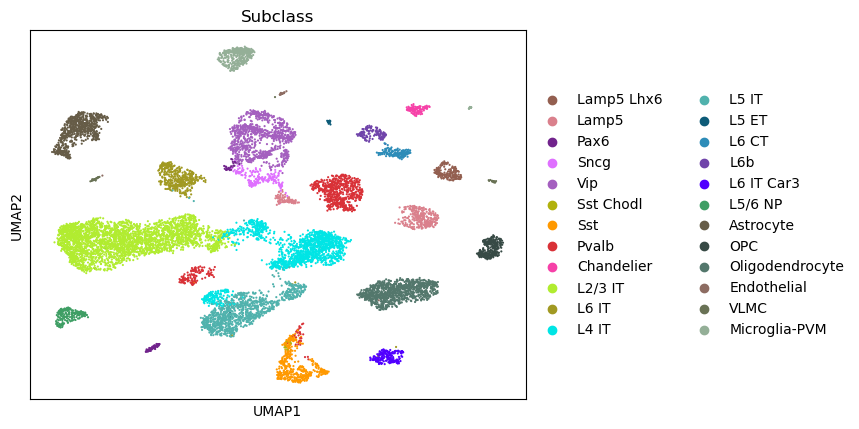

In [6]:
subset_plot(rna_mtg, 'Subclass', '_rna_mtg.pdf')

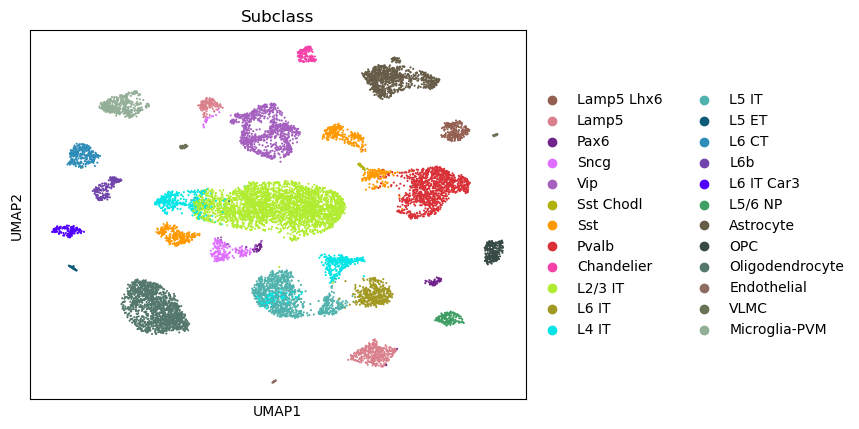

In [7]:
subset_plot(rna_dlpfc, 'Subclass', '_rna_dlpfc.pdf')

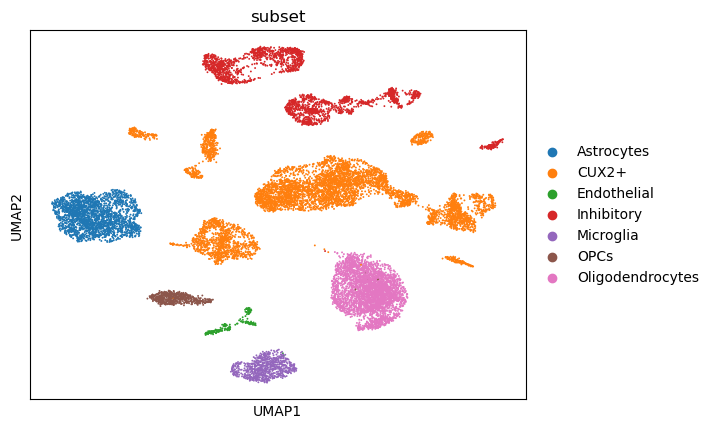

In [10]:
subset_plot(rna_sun, 'subset', '_rna_sun.pdf')

In [14]:
adata = ad.concat([rna_mtg, rna_dlpfc, rna_sun], join = 'outer')

In [16]:
adata

AnnData object with n_obs × n_vars = 4171637 × 2000
    obs: 'sample_id', 'Neurotypical reference', 'Donor_ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mon

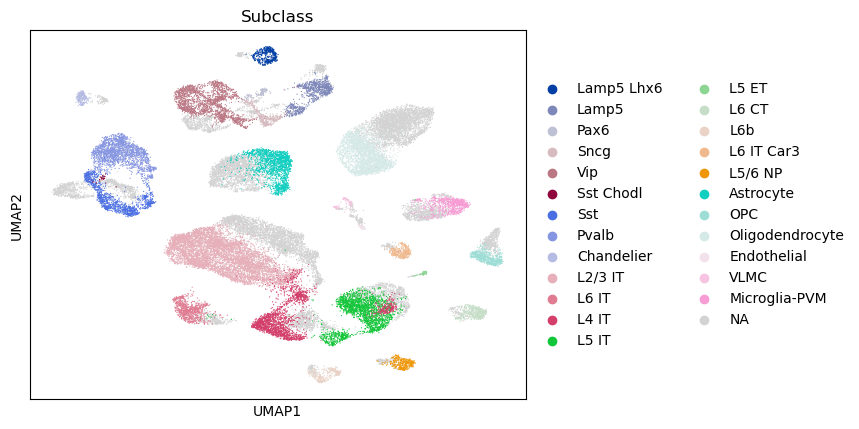

In [15]:
subset_plot(adata, 'Subclass', '_seaad_rosmap.pdf')

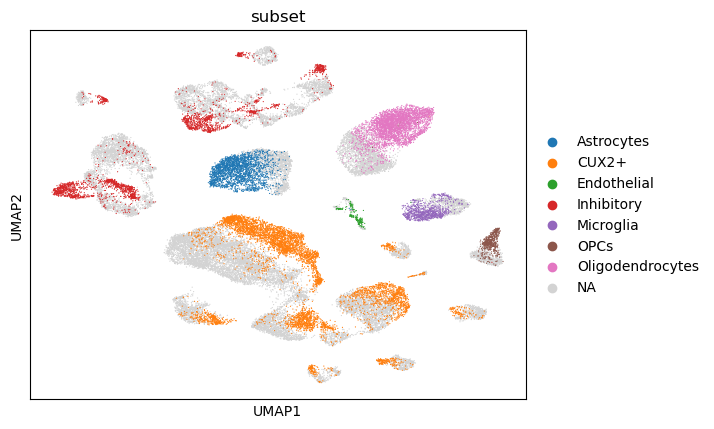

In [17]:
subset_plot(adata, 'subset', '_seaad_rosmap.pdf')